# EDA on List Of Billionaires published by Forbes

<li> Dataset is taken from Kaggle <a href='https://www.kaggle.com/datasets/prasertk/forbes-worlds-billionaires-list-2022?select=forbes_2022_billionaires.csv'>https://www.kaggle.com/datasets/prasertk/forbes-worlds-billionaires-list-2022?select=forbes_2022_billionaires.csv</a>

## Table of Contents
<ol>
<li> [Objective](#Objective)</li>
<li> Importing libraries</li>
<li> Loading the Dataset</li>
<li> Exploratory Data Analysis (EDA) </li>
<li> Data Preprocessing</li>
<li> Top 10 Billionaires</li>
<li> Sector Analysis</li>
<li>Top 10 sources of Income</li>
<li> Top Countries with most billionaires</li> 
<li> Age distribution</li>
<li> Gender wise distribution</li>
<li> Indian Billionaires - State wise</li>
<li>Top 10 Sources in India</li>
<li> Women Billiionaires from India, their final worth and industry</li>
<li> Top 20 Indian Billionaires</li>
<li> Relationship between country, Industry and Age</li>
<li> Relationship between money and age</li>
<li> Insights gained</li>


## <a id='Objective'>Objective</a>
<li> Identify which industry drives the most billionaires</li>
<li> To find patterns among billionaires around the world and analyze the business environment of different countries.</li>
<li> To gain interesting insights by visualizing the data</li>


## 2. Importing Libraries

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## 3. Loading the Dataset

In [2]:
# import csv file
rich_df=pd.read_csv('G:/Machine_learning/github/billionaire_eda/Dataset/forbes_2022_billionaires.csv')
rich_df.head()

,rank,personName,age,finalWorth,year,month,category,source,country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
0,1,Elon Musk,50.0,219000.0,2022,4,Automotive,"Tesla, SpaceX",United States,Texas,...,Tesla,True,M,1971-06-28,CEO,1.0,NaN,NaN,Elon Musk is working to revolutionize transpor...,Musk was accepted to a graduate program at Sta...
1,2,Jeff Bezos,58.0,171000.0,2022,4,Technology,Amazon,United States,Washington,...,Amazon,True,M,1964-01-12,Entrepreneur,1.0,"Seattle-Tacoma-Bellevue, WA",NaN,Jeff Bezos founded e-commerce giant Amazon in ...,"Growing up, Jeff Bezos worked summers on his g..."
2,3,Bernard Arnault & family,73.0,158000.0,2022,4,Fashion & Retail,LVMH,France,NaN,...,LVMH Moët Hennessy Louis Vuitton,False,M,1949-03-05,Chairman and CEO,NaN,NaN,NaN,Bernard Arnault oversees the LVMH empire of so...,"Arnault apparently wooed his wife, Helene Merc..."
3,4,Bill Gates,66.0,129000.0,2022,4,Technology,Microsoft,United States,Washington,...,Bill & Melinda Gates Foundation,True,M,1955-10-28,Cofounder,4.0,"Seattle-Tacoma-Bellevue, WA",NaN,Bill Gates turned his fortune from software fi...,"When Gates was a kid, he spent so much time re..."
4,5,Warren Buffett,91.0,118000.0,2022,4,Finance & Investments,Berkshire Hathaway,United States,Nebraska,...,Berkshire Hathaway,True,M,1930-08-30,CEO,5.0,"Omaha, NE",NaN,"Known as the ""Oracle of Omaha,"" Warren Buffett...","Buffett still lives in the same Omaha, Nebrask..."


## 4. Exploratory Data Analysis (EDA)

In [3]:
# Let's take a look at the shape of the dataset
rich_df.shape

(2668, 22)

#####  The dataset has 2668 rows and 22 columns

In [4]:
# Let's look at the type of columns
rich_df.dtypes

rank                      int64
personName               object
age                     float64
finalWorth              float64
year                      int64
month                     int64
category                 object
source                   object
country                  object
state                    object
city                     object
countryOfCitizenship     object
organization             object
selfMade                   bool
gender                   object
birthDate                object
title                    object
philanthropyScore       float64
residenceMsa             object
numberOfSiblings        float64
bio                      object
about                    object
dtype: object

In [5]:
# Let's remove the unnecessary columns
rich_df.drop(['residenceMsa', 'numberOfSiblings', 'bio','about','birthDate','countryOfCitizenship','year','month','organization'], axis = 1, inplace = True)
rich_df.head()

,rank,personName,age,finalWorth,category,source,country,state,city,selfMade,gender,title,philanthropyScore
0,1,Elon Musk,50.0,219000.0,Automotive,"Tesla, SpaceX",United States,Texas,Austin,True,M,CEO,1.0
1,2,Jeff Bezos,58.0,171000.0,Technology,Amazon,United States,Washington,Seattle,True,M,Entrepreneur,1.0
2,3,Bernard Arnault & family,73.0,158000.0,Fashion & Retail,LVMH,France,NaN,Paris,False,M,Chairman and CEO,NaN
3,4,Bill Gates,66.0,129000.0,Technology,Microsoft,United States,Washington,Medina,True,M,Cofounder,4.0
4,5,Warren Buffett,91.0,118000.0,Finance & Investments,Berkshire Hathaway,United States,Nebraska,Omaha,True,M,CEO,5.0


In [6]:
#Let's take a look at the general information in the dataset.
rich_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               2668 non-null   int64  
 1   personName         2668 non-null   object 
 2   age                2582 non-null   float64
 3   finalWorth         2668 non-null   float64
 4   category           2668 non-null   object 
 5   source             2668 non-null   object 
 6   country            2655 non-null   object 
 7   state              748 non-null    object 
 8   city               2624 non-null   object 
 9   selfMade           2668 non-null   bool   
 10  gender             2652 non-null   object 
 11  title              401 non-null    object 
 12  philanthropyScore  396 non-null    float64
dtypes: bool(1), float64(3), int64(1), object(8)
memory usage: 252.9+ KB


In [7]:
# Let's look at the summary statistics for numerical columns in our DataFrame.
rich_df.describe()

,rank,age,finalWorth,philanthropyScore
count,2668.000000,2582.000000,2668.000000,396.000000
mean,1302.919040,64.210689,4762.350075,1.856061
std,747.807782,13.401258,10540.482258,0.971486
min,1.000000,19.000000,1000.000000,1.000000
25%,665.000000,55.000000,1500.000000,1.000000
50%,1292.000000,64.000000,2400.000000,2.000000
75%,1929.000000,74.000000,4300.000000,2.000000
max,2578.000000,100.000000,219000.000000,5.000000


## 5. Data Preprocessing

In [9]:
# checking for duplicates
sum(rich_df.duplicated())

0

#### Checking for Null values

In [10]:
rich_df.isnull().sum()

rank                    0
personName              0
age                    86
finalWorth              0
category                0
source                  0
country                13
state                1920
city                   44
selfMade                0
gender                 16
title                2267
philanthropyScore    2272
dtype: int64

#### Let's explore the age column as it has 86 null values

In [15]:
rich_df.age.describe()


count    2582.000000
mean       64.210689
std        13.401258
min        19.000000
25%        55.000000
50%        64.000000
75%        74.000000
max       100.000000
Name: age, dtype: float64

<h5><b>A quick insight.</b></h5> Min age is 19 which means there are people who have become billionares at the age of just 19.

In [14]:
rich_df.age.mode()

0    57.0
1    59.0
Name: age, dtype: float64

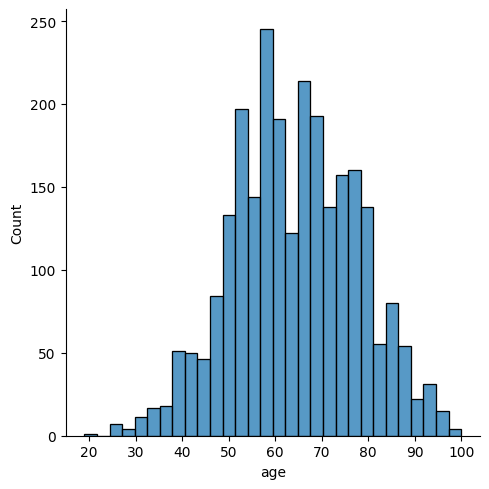

In [16]:
# Visualising distribution of age column
sns.displot(data=rich_df,x='age')

It follows a Normal distribution. So, We can replace missing values with mean values in this data distribution.

In [18]:
# Filling age with mean value
rich_df.age.fillna(rich_df.age.mean(),inplace=True)
rich_df.age.isnull().sum()

0

## 6. Top 10 Billionaires

<Figure size 1920x1440 with 0 Axes>

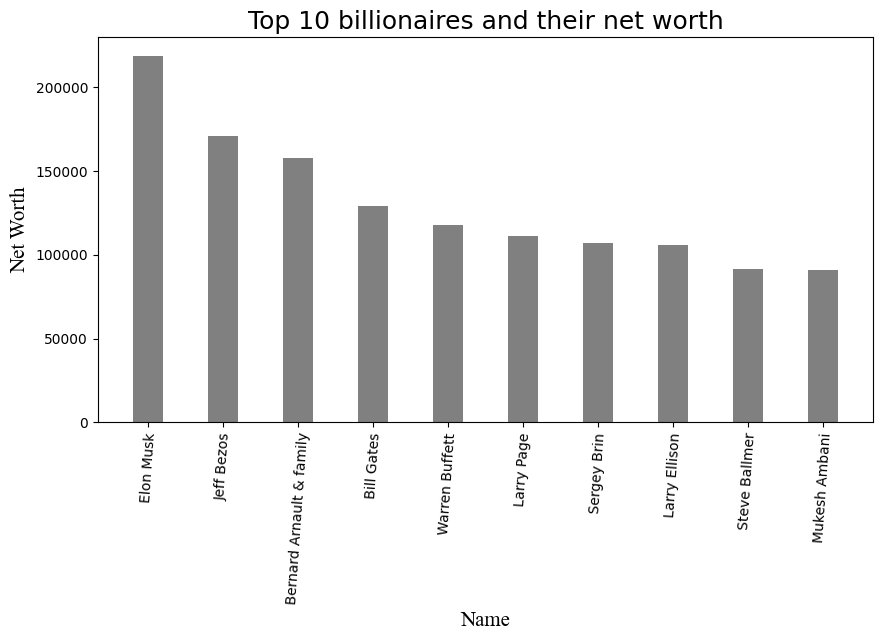

In [80]:
top_10=rich_df[['personName','finalWorth']]
name=top_10.personName[0:10].to_frame()
net_worth=top_10.finalWorth[0:10]
x_axis_name=np.arange(len(name))
plt.figure(dpi=300)
plt.figure(figsize=(10,5))
plt.bar(x_axis_name,net_worth,width=0.4,align="center",color="grey")
font_style={'family':'times new roman','size':15,'color':'k'}
plt.xlabel("Name",fontdict=font_style)
plt.ylabel("Net Worth",fontdict=font_style)
plt.xticks(x_axis_name,name["personName"],rotation=86)
plt.title("Top 10 billionaires and their net worth", fontsize = 18,color='k')
plt.show()

<li><b> Elon Musk is the top billionaire in the world with net worth more than $200 billion

## 7. Sector Analysis
Let's find out Billionaires Count as per Industry


In [19]:
rich_df['category'].value_counts()

Finance & Investments         392
Technology                    343
Manufacturing                 337
Fashion & Retail              250
Healthcare                    217
Food & Beverage               203
Real Estate                   193
Diversified                   180
Media & Entertainment          99
Energy                         95
Automotive                     70
Metals & Mining                68
Service                        53
Construction & Engineering     46
Telecom                        37
Logistics                      35
Sports                         27
Gambling & Casinos             23
Name: category, dtype: int64

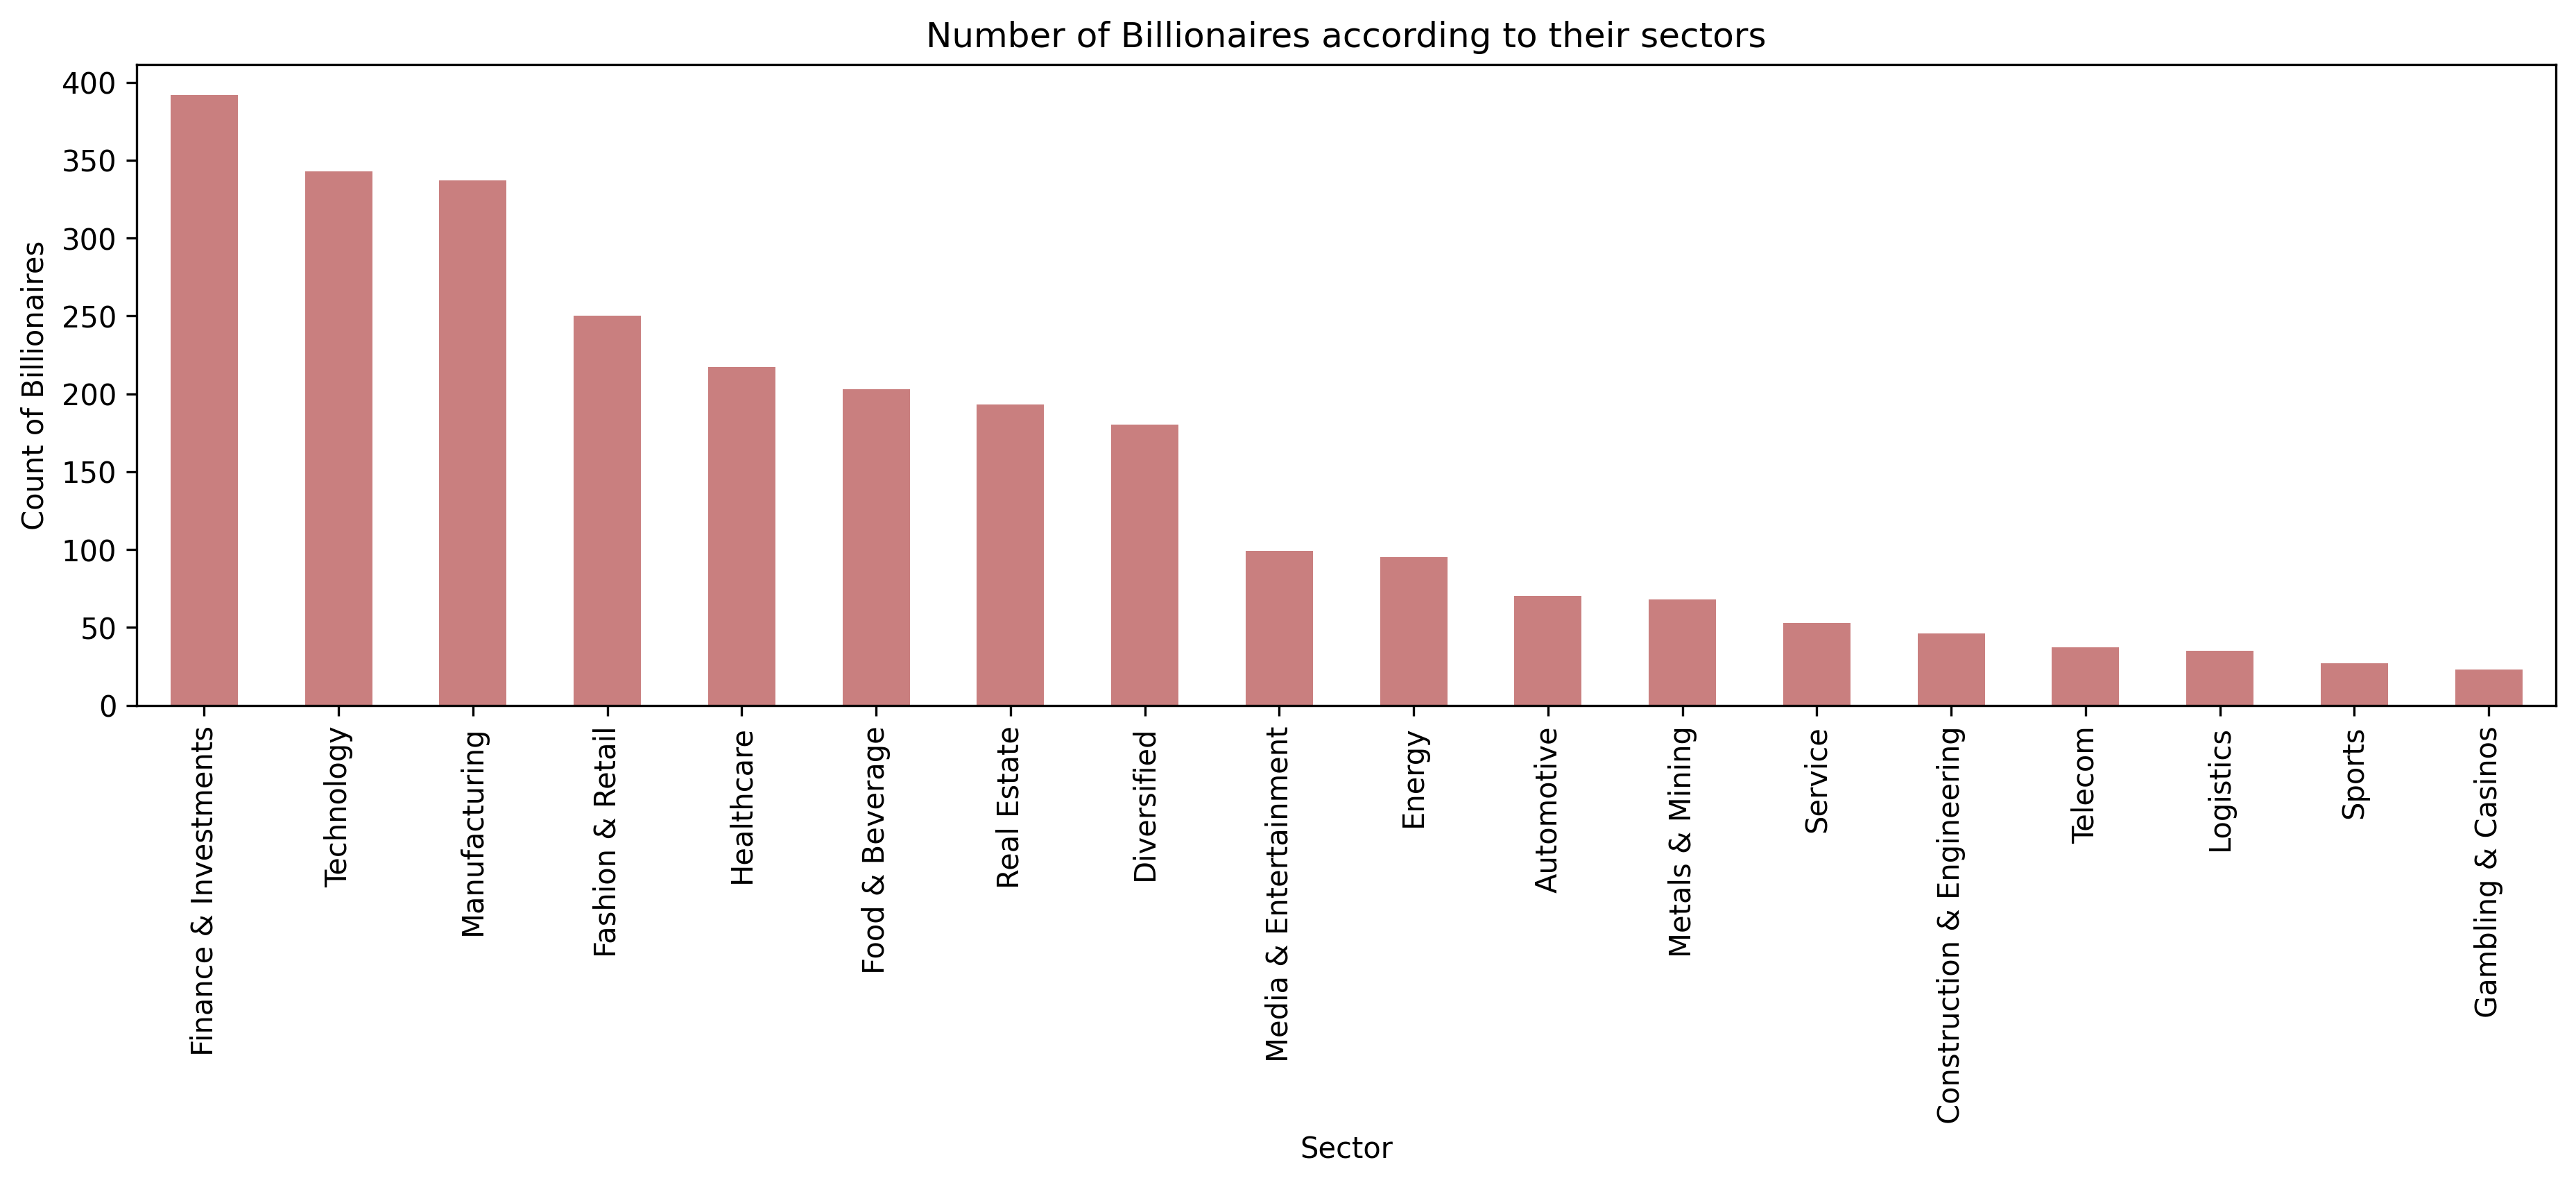

In [92]:
plt.figure(dpi=300)
rich_df['category'].value_counts().plot(kind='bar',figsize=(15,4),color='brown',alpha=0.6)
plt.xticks(rotation=90)
plt.xlabel("Sector")
plt.ylabel("Count of Billionaires")
plt.title("Number of Billionaires according to their sectors")
plt.show()

<h5> <b>  <li> Most of the billionaires belong to "Finance & Investments" Sector, followed by "Technology" </li></b></h5>

<li>Top 5 industries that made number of billionaires</li>
<ol><li>Finance & Investments</li>
<li>Technology</li>
<li>Manufacturing</li>
<li>Fashion & Retail</li>
<li> Healthcare</li>




## 8.Top 10 sources of Income

In [184]:
rich_df.source.value_counts().head(10)

real estate        151
investments         94
pharmaceuticals     93
diversified         84
software            64
hedge funds         42
private equity      40
chemicals           36
retail              36
manufacturing       29
Name: source, dtype: int64

<li>"REAL - ESTATE" is the dominating Source of income 

##  9. Top Countries with most billionaires

Let's take a look at countries with the most billionaries. First, let us calculate the number of unique countries.

In [27]:
len(rich_df["country"].unique())

74

<Figure size 1920x1440 with 0 Axes>

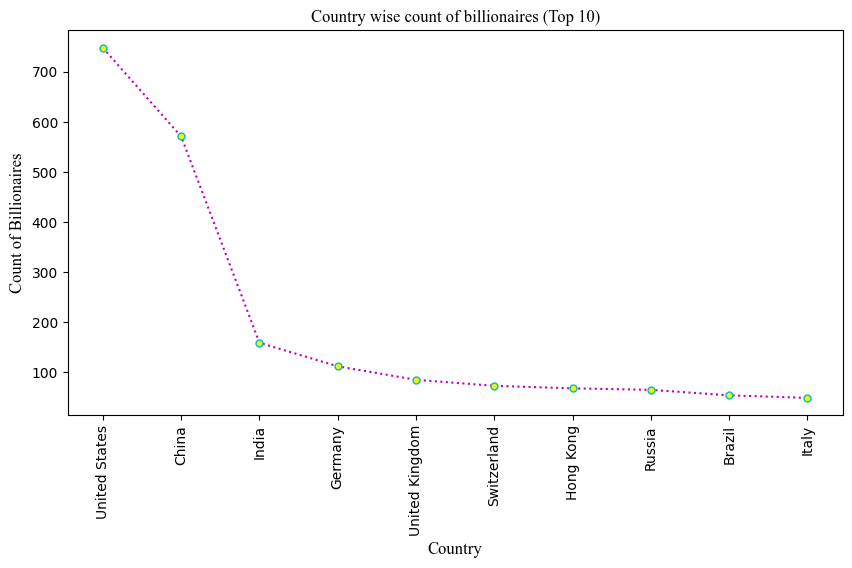

In [38]:
country_df=rich_df.groupby("country")
country_count_df=pd.DataFrame(country_df.size().sort_values(ascending=False), columns=["Count"])
plt.figure(dpi=300)
plt.figure(figsize=(10,5))
plt.plot(country_count_df.index[:10],country_count_df["Count"][:10],
         linestyle='dotted',marker='o',ms="5",mec="c",mfc="#F1F112",c='m')
font_style={'family':'times new roman','size':12,'color':'k'}
plt.xticks(rotation=90)
plt.xlabel("Country",fontdict=font_style)
plt.ylabel("Count of Billionaires",fontdict=font_style)
plt.title("Country wise count of billionaires (Top 10)",fontdict=font_style)
plt.show()


<li> United States is the country which has maximum number of billionaires.
<li>India is the 3rd position in billionaires count

## 10. Age distribution

64.21068938807127


Text(0.5, 1.0, 'Age wise distribution')

<Figure size 1920x1440 with 0 Axes>

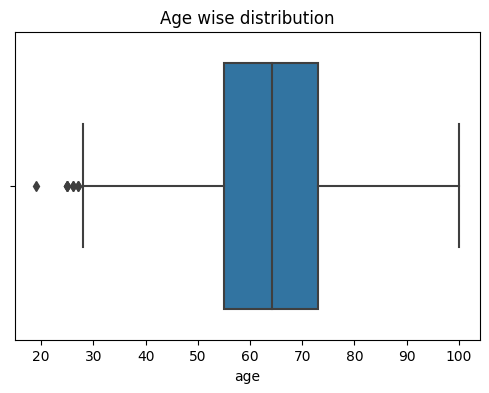

In [43]:
#age - box plot
plt.figure(dpi=300)
plt.figure(figsize=(6,4))
rich_df['age'].value_counts()
print(rich_df['age'].mean())
sns.boxplot(data=rich_df,x='age')
plt.title('Age wise distribution', fontsize = 12)

Most of the Billionaires belong to age group of 55-75 years. Average age is around 64

<Figure size 1920x1440 with 0 Axes>

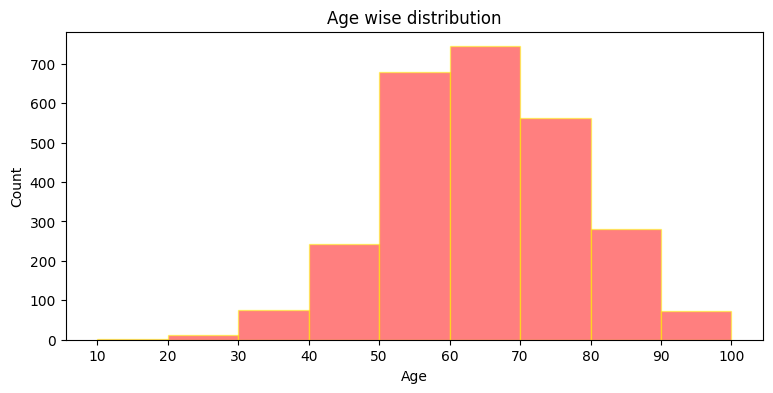

In [47]:
#histogram of ages
age=rich_df['age']
bins=np.arange(10,110,10)
plt.figure(dpi=300)
plt.figure(figsize=(9,4))
plt.hist(age,bins,facecolor="red",edgecolor="yellow",alpha=0.5)  
plt.xticks(bins)
plt.title("Age wise distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

<Figure size 1920x1440 with 0 Axes>

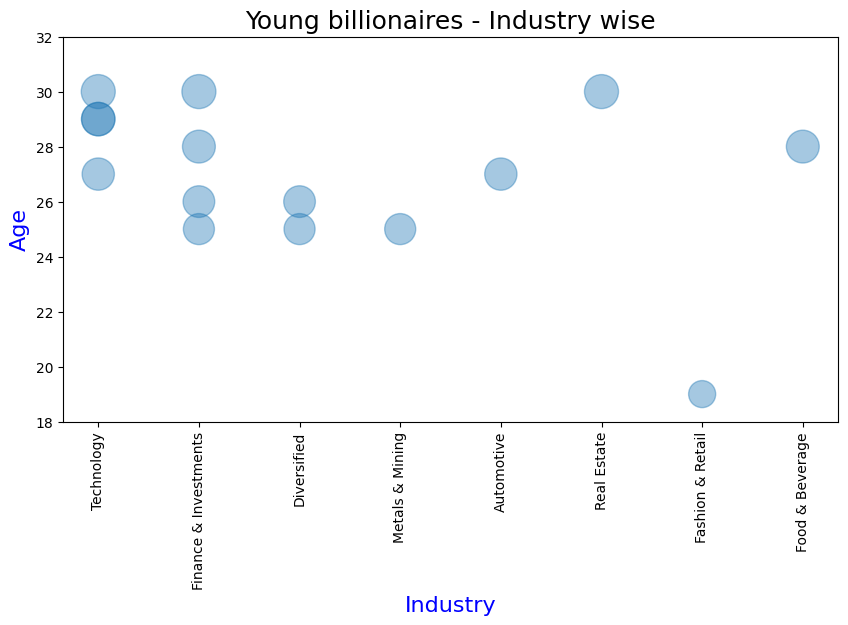

In [57]:
# Young Billionaires vs Industry

youth=rich_df[rich_df['age']<=30]
df1 = youth[['category','age']].copy()
df1['freq_count'] = df1.groupby('category')['category'].transform('count')
df4=df1.groupby('freq_count').apply(lambda x: x.sort_values('category'))
df4=df4.sort_index(ascending=False)
df4["category"].value_counts()
x_categ=df4["category"]
y_age=df4["age"]
plt.figure(dpi=300) 
plt.figure(figsize=(10,5))
plt.scatter('category', 'age',s=y_age*20,data=df4,alpha=0.4)
plt.xlabel("Industry", size=16,color="blue")
plt.ylabel("Age", size=16,color="blue")
plt.title("Young billionaires - Industry wise", size=18)
plt.xticks(rotation=90)
plt.ylim(18,32)
plt.show()

<li> Billionaires below 30 years of age are mostly from "Technology" and "Finance & Investments"</li>
<li>The youngest billionaire belongs to "Fashion & Retail" Industry.</li>

## 11. Gender wise distribution

In [97]:
rich_df["gender"].value_counts()

M    2341
F     311
Name: gender, dtype: int64

<Figure size 1920x1440 with 0 Axes>

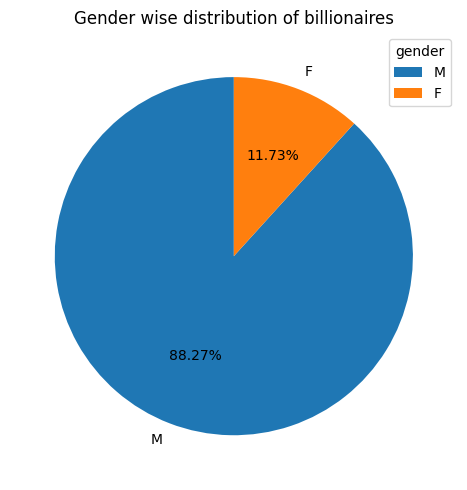

In [96]:
gender_df=rich_df['gender'].value_counts()
plt.figure(dpi=300)
plt.figure(figsize=(10,5))
plt.pie(gender_df,labels=gender_df.index,startangle=90,autopct="%.2f%%")
plt.legend(title="gender")
plt.title("Gender wise distribution of billionaires")
plt.tight_layout()
plt.show()

<li> 88% of billionaires are male.
<li>11.7 % are females.
<li> Most billionaires are male


## 12. Indian Billionaires - State Wise


<Figure size 1920x1440 with 0 Axes>

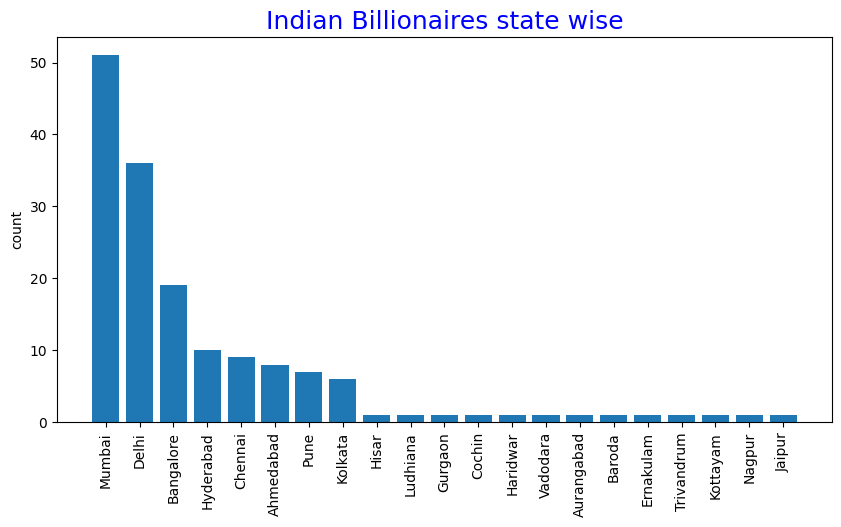

In [94]:
#Indian Billionaires State wise
indians=rich_df[rich_df['country']=='India']
indian_city=indians['city'].value_counts().to_frame()
x_axis_city=np.arange(len(indian_city))
plt.figure(dpi=300)
plt.figure(figsize=(10,5))
plt.bar(indian_city.index,indian_city["city"])
plt.xticks(x_axis_city,indian_city.index,rotation=90)
plt.title("Indian Billionaires state wise",fontsize = 18,color='blue')
plt.ylabel("count")
plt.show()

<b><li>Most Indian Billionaires live in Mumbai, Delhi, and Bangalore</li></b>


## 13. Top 10 Sources in India

In [183]:
indians.source.value_counts().head(10)

pharmaceuticals       23
consumer goods        15
diversified            9
real estate            9
software services      8
financial services     6
auto parts             5
chemicals              4
paints                 4
adhesives              4
Name: source, dtype: int64

<li>Pharmaceuticals and Consumer goods are the top sources in India

## 14.Women Billiionaires from India, their final worth and industry

In [149]:
indians_f = rich_df[(rich_df['country'] == 'India') & (rich_df['gender'] == 'F')]

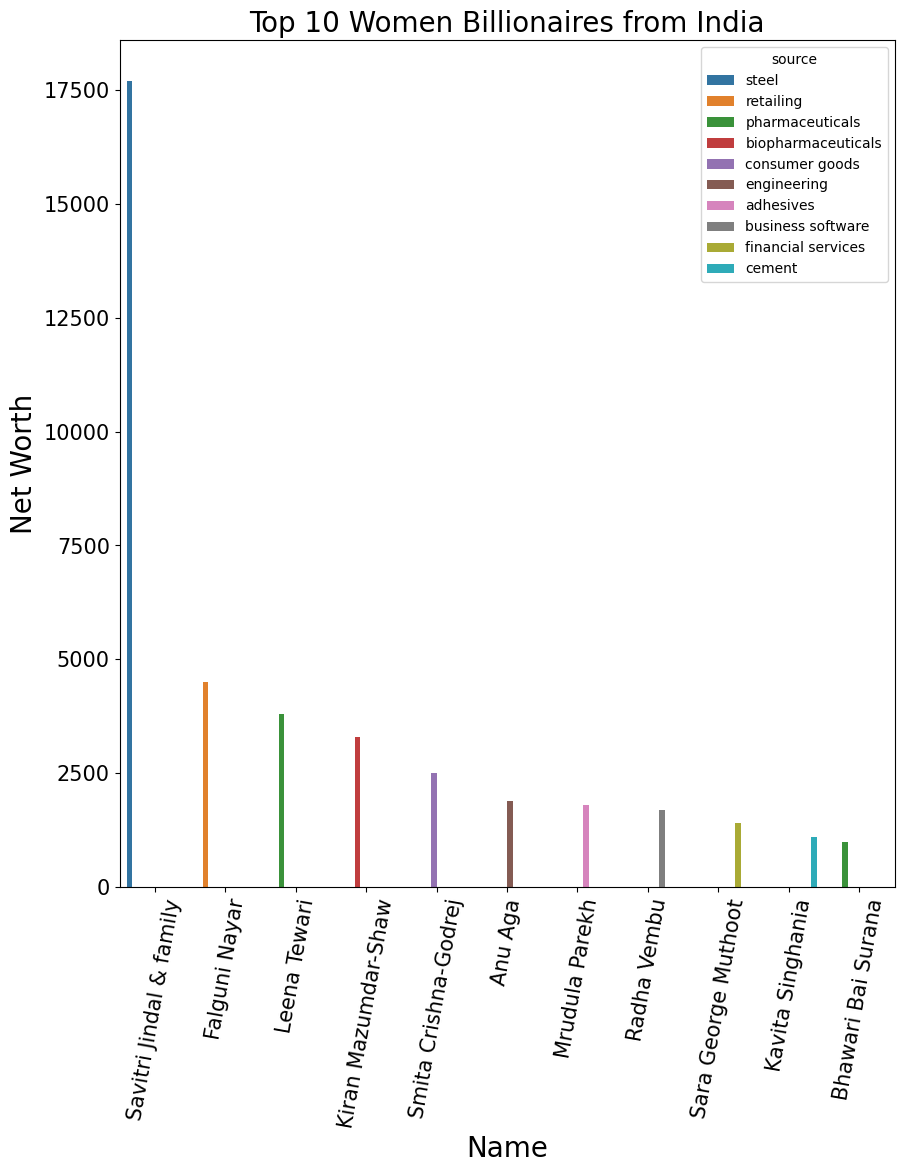

In [181]:
plt.figure(figsize = (10,11))
sns.barplot(x="personName",y="finalWorth",hue='source',data=indians_f)
plt.xticks(rotation = 80 , fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Name",fontsize=20)
plt.ylabel("Net Worth",fontsize=20)
plt.title("Top 10 Women Billionaires from India",fontsize=20)
plt.show()

## 15. Top 20 Indian Billionaires

C:\Users\Kalpagam\AppData\Local\Temp\ipykernel_17136\701300815.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ind_top_name=ind_top.personName[0:20].to_frame()
C:\Users\Kalpagam\AppData\Local\Temp\ipykernel_17136\701300815.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ind_net_worth=ind_top.finalWorth[0:20]


<Figure size 1920x1440 with 0 Axes>

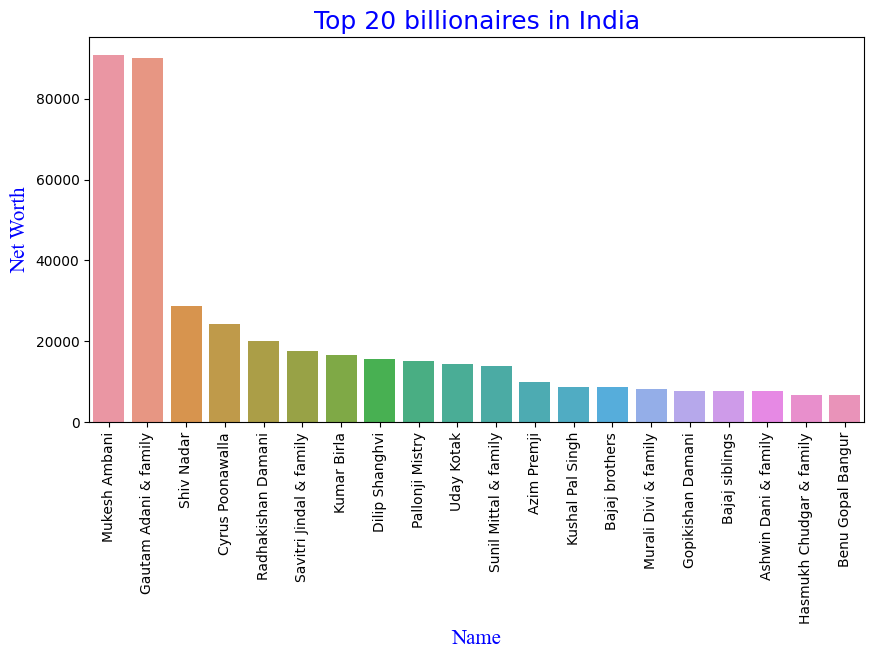

In [71]:
ind_top=indians[['personName','finalWorth']]
ind_top_name=ind_top.personName[0:20].to_frame()
ind_net_worth=ind_top.finalWorth[0:20]
x1=np.arange(len(ind_top_name))
plt.figure(dpi=300)
plt.figure(figsize=(10,5))
sns.barplot(x=x1,y=ind_net_worth)
font_style={'family':'times new roman','size':15,'color':'blue'}
plt.xlabel("Name",fontdict=font_style)
plt.ylabel("Net Worth",fontdict=font_style)
plt.xticks(x1,ind_top_name["personName"],rotation=90)
plt.title("Top 20 billionaires in India", fontsize = 18,color='blue')
plt.show()

<li><b>The top 3 Billionaires in India are Mukesh Ambani, Adani and Shiv Nadar</b></li>

## 16. Relationship between country, Industry and Age

In [114]:
#x=sector, y=age, bubble=country
top_30=rich_df.loc[:30,['age','category','country']]
df1=top_30.copy()


In [117]:
top_30["category"].value_counts()

Technology               9
Fashion & Retail         8
Diversified              4
Media & Entertainment    3
Automotive               2
Finance & Investments    2
Telecom                  1
Food & Beverage          1
Logistics                1
Name: category, dtype: int64

In [118]:
top_30["country"].value_counts()

United States    18
France            3
China             3
India             2
Mexico            1
Singapore         1
Spain             1
Canada            1
Germany           1
Name: country, dtype: int64

In [119]:
# using label encoding
from sklearn.preprocessing import LabelEncoder
lcat=LabelEncoder()
lcou=LabelEncoder()
df1["category_enc"]=lcat.fit_transform(top_30.category)
df1["country_enc"]=lcou.fit_transform(top_30.country)
x_scale=(df1["category"].unique().shape)[0]

In [120]:
#encoded values decode
df1["category_enc"].unique()
df1["country_enc"].unique()


array([8, 2, 4, 5, 1, 6, 7, 0, 3])

<Figure size 1920x1440 with 0 Axes>

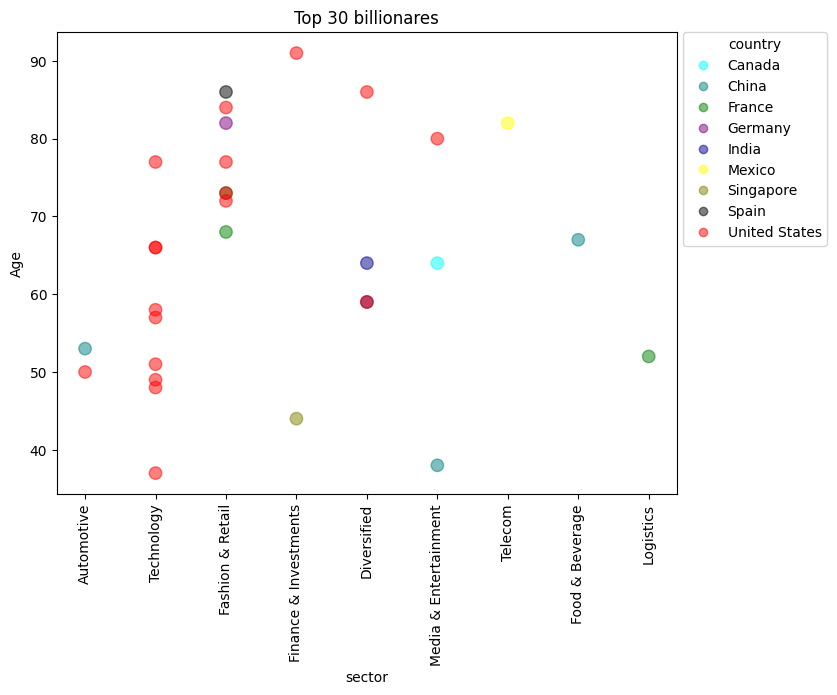

In [134]:
from matplotlib.colors import ListedColormap
plt.figure(dpi=300)
plt.figure(figsize=(8,6))
colors=ListedColormap(['cyan', 'teal', 'green','purple','darkblue','yellow','olive','black','red'])
scatter=plt.scatter(df1["category"],df1["age"],c=df1.country.astype('category').cat.codes,
            marker="o",s=80,alpha=0.5,cmap=colors)
plt.xlabel("sector")
plt.ylabel("Age")
plt.title("Top 30 billionares")

country=lcou.inverse_transform([0,1,2,3,4,5,6,7,8]).tolist()
plt.legend(handles=scatter.legend_elements()[0],labels=country,
           title="country",bbox_to_anchor=(1.01, 1),
                      borderaxespad=0)
plt.xticks(lcat.inverse_transform(range(0,x_scale)),rotation='vertical')
plt.show()

<li>We can see that United States overshadows other countries in Technology sector. </li>

## 17. Relationship between Money and Age

Text(0.5, 1.0, 'Relationship between money and age')

<Figure size 1920x1440 with 0 Axes>

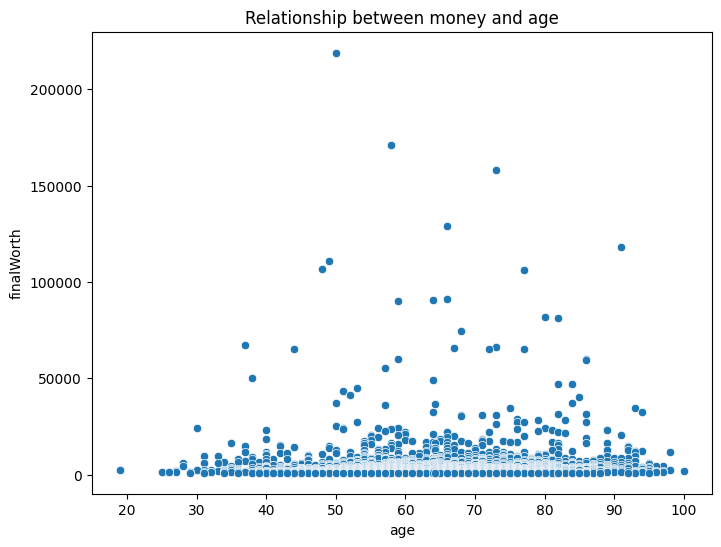

In [147]:
plt.figure(dpi=300)
plt.figure(figsize=(8,6))
sns.scatterplot(x=rich_df["age"], y=rich_df["finalWorth"])
plt.title('Relationship between money and age', fontsize = 12)

<li>There is no relationship between money and age</li>

## 18. Here are the insights gained after performing analysis and visualizations

<li>Elon Musk is the top billionaire in the world with net worth more than $200 billion</li>
<li>United States is the country which has maximum number of billionaires.
<li>Most of the Billionaires belong to age group of 55-75 years. Average age is around 64.
<li>"REAL - ESTATE" is the dominating Source of income.
<li> 88% of billionaires are male.
<li>United States overshadows other countries in Technology sector.
<li>There is no relationship between money and age.
<li> The top 3 sectors which drives billionaires are
<ol><li>Finance & Investments</li>
<li>Technology</li>
<li>Manufacturing</li></ol>

India's Contribution
<li>India is in the 3rd position in billionaires count.
<li>The top 3 Billionaires in India are Mukesh Ambani, Adani and Shiv Nadar
<li>Most Indian Billionaires live in Mumbai, Delhi, and Bangalore.
<li>Pharmaceuticals and Consumer goods are the top sources in India.